# Logistic regression

## 0. Iris flower dataset

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
df = load_iris(as_frame= True)
iris_df = df.frame
iris_df["specie_name"] = iris.target
iris_df["specie_name"].replace([0, 1, 2], ["Setosa", "Versicolour", "Virginica"], inplace = True)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,specie_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


In [7]:
print(iris_df.describe())
print(iris_df.info())
print(iris_df.columns)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149


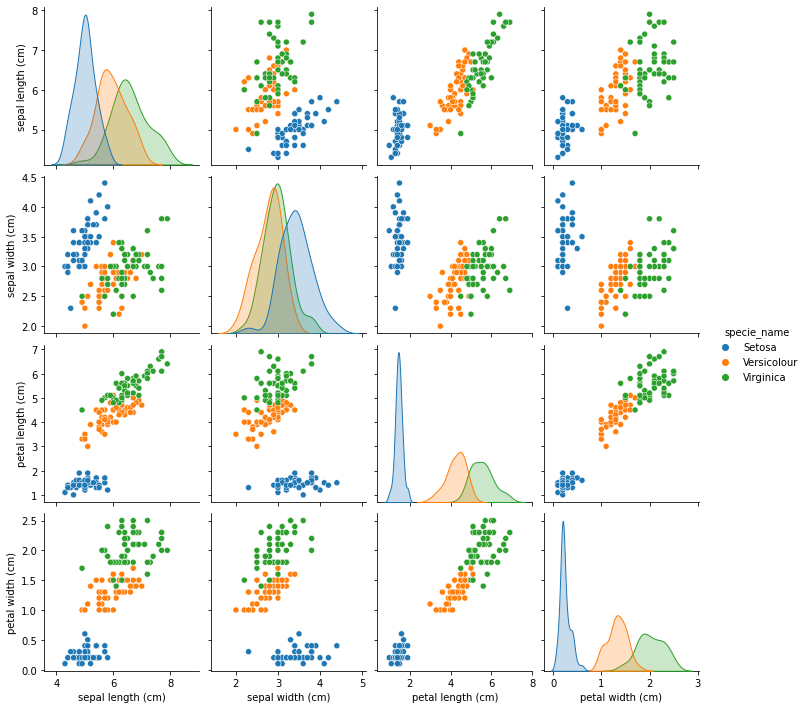

In [8]:
sns.pairplot(iris_df.drop(["target"], axis="columns"), hue="specie_name")

<AxesSubplot:>

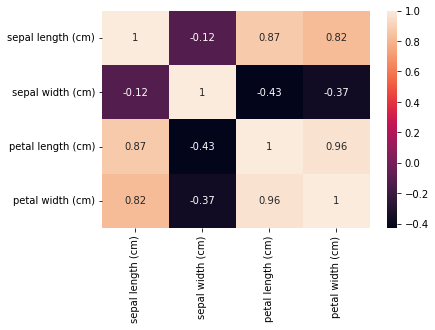

In [9]:
sns.heatmap(iris_df.drop(["target", "specie_name"], axis="columns").corr(), annot=True)

In [24]:
Q1 = iris_df.quantile(q=0.25)
Q3 = iris_df.quantile(q=0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [49]:
d = iris_df[iris_df.isin(["Setosa"])].index
d

RangeIndex(start=0, stop=150, step=1)

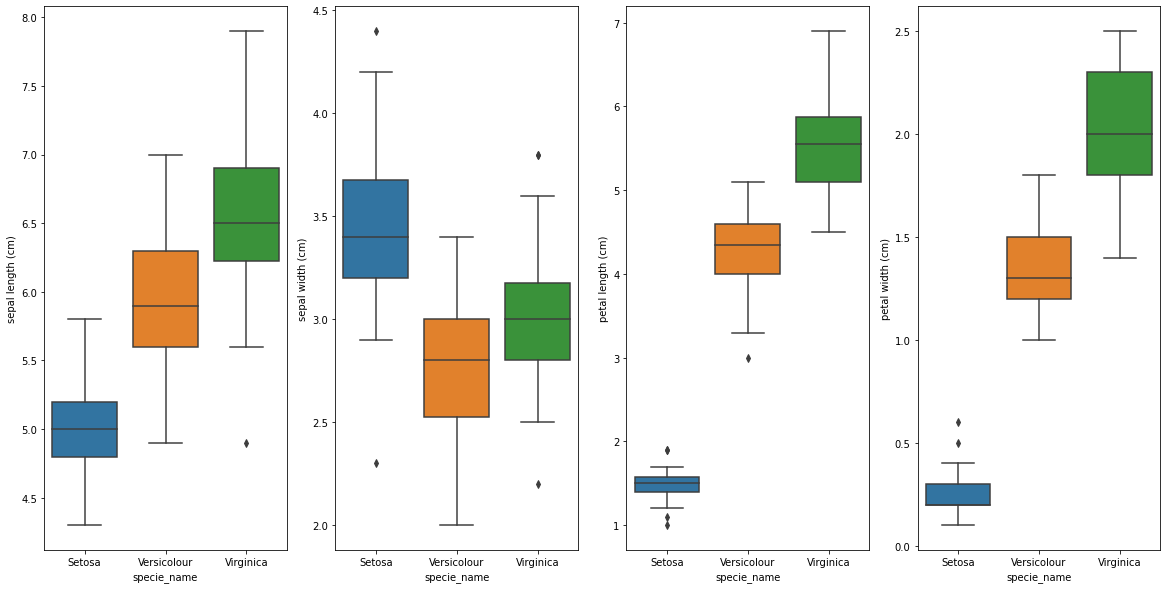

In [11]:
fig, axes = plt.subplots(1, 4, figsize = (20, 10))

for ax, col in zip(axes, ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]):
    sns.boxplot(data=iris_df, x="specie_name", y=col, ax=ax)

In [12]:
iris_df.quantile(q=0.25)

sepal length (cm)    5.1
sepal width (cm)     2.8
petal length (cm)    1.6
petal width (cm)     0.3
target               0.0
Name: 0.25, dtype: float64

In [13]:
# from sklearn.model_selection import train_test_split

# X, y =

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)